In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np
import kwant

In [21]:
syst = kwant.Builder()

# Here, we are only working with square lattices
a = 1
lat = kwant.lattice.square(a)

t = 1.0
W = 1
L = 30

# Define the scattering region

for i in range(L):
    for j in range(W):
        # On-site Hamiltonian
        syst[lat(i, j)] = 4 * t

        # Hopping in y-direction
        if j > 0:
            syst[lat(i, j), lat(i, j - 1)] = -t

        # Hopping in x-direction
        if i > 0:
            syst[lat(i, j), lat(i - 1, j)] = -t

# Then, define and attach the leads:

# First the lead to the left
# (Note: TranslationalSymmetry takes a real-space vector)
sym_left_lead = kwant.TranslationalSymmetry((-a, 0))
left_lead = kwant.Builder(sym_left_lead)

for j in range(W):
    left_lead[lat(0, j)] = 4 * t
    if j > 0:
        left_lead[lat(0, j), lat(0, j - 1)] = -t
    left_lead[lat(1, j), lat(0, j)] = -t
    
sym_down_lead = kwant.TranslationalSymmetry((0, -a))
down_lead = kwant.Builder(sym_down_lead)

for j in range(L):
    down_lead[lat(j, -1)] = 4 * t
    if j > 0:
        down_lead[lat(j, -1), lat(j-1, - 1)] = -t
    down_lead[lat(j, -1), lat(j, 0)] = -t

syst.attach_lead(left_lead)
syst.attach_lead(left_lead.reversed())
syst.attach_lead(down_lead)
sysf = syst.finalized()

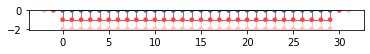

In [22]:
kwant.plot(syst)
plt.show()

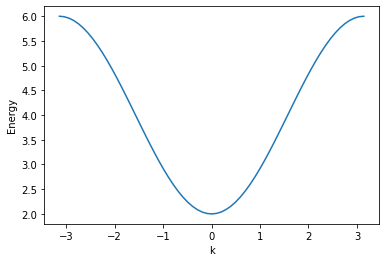

In [23]:
kwant.plotter.bands(sysf.leads[0])
plt.show()

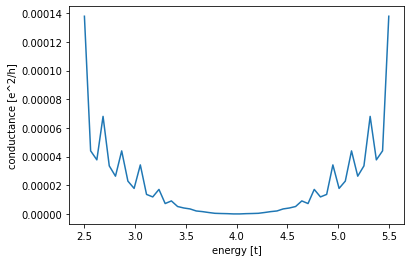

In [26]:
energies = np.linspace(2.5,5.5)
data = []
for ee in energies:
    smatrix = kwant.smatrix(sysf, ee)

    # compute the transmission probability from lead 0 to
    # lead 1

    data.append(smatrix.transmission(0, 1))
    


plt.figure()
plt.plot(energies, data)
plt.xlabel("energy [t]")
plt.ylabel("conductance [e^2/h]")
plt.show()
